In [1]:
import quandl
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline

In [3]:
plt.style.use('fivethirtyeight')
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 14
matplotlib.rcParams['ytick.labelsize'] = 14
matplotlib.rcParams['text.color'] = 'k'

In [4]:
quandl.ApiConfig.api_key = 'rFsSehe51RLzREtYhLfo'

# Retrieve TSLA data from Quandl
tesla = quandl.get('WIKI/TSLA')

# Retrieve the GM data from Quandl
gm = quandl.get('WIKI/GM')
gm.head(5)

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2010-11-18,35.00,35.99,33.89,34.19,457044300.0,0.0,1.0,29.988317,30.836558,29.037259,29.294302,457044300.0
2010-11-19,34.15,34.50,33.11,34.26,107842000.0,0.0,1.0,29.260029,29.559912,28.368948,29.354278,107842000.0
2010-11-22,34.20,34.48,33.81,34.08,36650600.0,0.0,1.0,29.302870,29.542776,28.968714,29.200053,36650600.0
2010-11-23,33.95,33.99,33.19,33.25,31170200.0,0.0,1.0,29.088668,29.122940,28.437493,28.488901,31170200.0
2010-11-24,33.73,33.80,33.22,33.48,26138000.0,0.0,1.0,28.900170,28.960146,28.463197,28.685967,26138000.0


In [5]:
gm.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1849 entries, 2010-11-18 to 2018-03-27
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Open         1849 non-null   float64
 1   High         1849 non-null   float64
 2   Low          1849 non-null   float64
 3   Close        1849 non-null   float64
 4   Volume       1849 non-null   float64
 5   Ex-Dividend  1849 non-null   float64
 6   Split Ratio  1849 non-null   float64
 7   Adj. Open    1849 non-null   float64
 8   Adj. High    1849 non-null   float64
 9   Adj. Low     1849 non-null   float64
 10  Adj. Close   1849 non-null   float64
 11  Adj. Volume  1849 non-null   float64
dtypes: float64(12)
memory usage: 187.8 KB


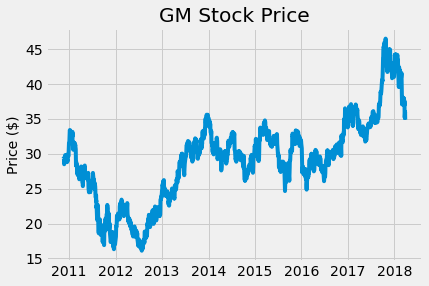

In [6]:

# The adjusted close accounts for stock splits, so that is what we should graph
plt.plot(gm.index, gm['Adj. Close'])
plt.title('GM Stock Price')
plt.ylabel('Price ($)')
plt.show()

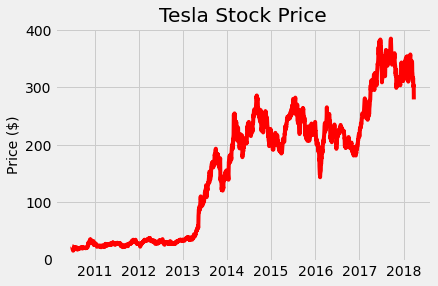

In [7]:
plt.plot(tesla.index, tesla['Adj. Close'], 'r')
plt.title('Tesla Stock Price')
plt.ylabel('Price ($)')
plt.show()

为了比较公司，我们需要计算它们的市值。 Quandl没有提供此数据，但我们可以通过将每年的已发行股票平均数量乘以股价来得出自己的市值。

In [8]:
# Yearly average number of shares outstanding for Tesla and GM
tesla_shares = {2018: 168e6, 2017: 162e6, 2016: 144e6, 2015: 128e6, 2014: 125e6, 
                2013: 119e6, 2012: 107e6, 2011: 100e6, 2010: 51e6}

gm_shares = {2018: 1.42e9, 2017: 1.50e9, 2016: 1.54e9, 2015: 1.59e9, 2014: 1.61e9, 
                2013: 1.39e9, 2012: 1.57e9, 2011: 1.54e9, 2010: 1.50e9}

In [13]:
# Create a year column 
tesla.index.year
# tesla['Year'] = tesla.index.year

# tesla.head()

# # Take Dates from index and move to Date column 
# tesla.reset_index(level=0, inplace = True)
# tesla['cap'] = 0

# # Calculate market cap for all years
# for i, year in enumerate(tesla['Year']):
#     # Retrieve the shares for the year
#     shares = tesla_shares.get(year)
    
#     # Update the cap column to shares times the price
#     tesla.iloc[i, 'cap'] = shares * tesla.iloc[i, 'Adj. Close']

AttributeError: 'RangeIndex' object has no attribute 'year'